In [48]:
from nltk.tokenize import word_tokenize
from graphviz import Digraph

In [111]:
sample = """
t1=LOAD(x);
t2=t1 +4;
t3=t1 *8;
t4=t1 -4;
t5=t1 /2;
t6=t2 * t3;
t7=t4-t5;
t8=t6 * t7;
STORE(y , t8 );"""




In [142]:
keywords = ["if", "LOAD", "STORE", "="]
operators = ["*","/","+","-"]
delims = [" ", "(",")","="]

def parse(code):
    dot = Digraph()
    
    
    instructions = [instr.strip("\n") for instr in code.split(";")[:-1]]
    print(instructions)
    tokenized_list = []
    for instr in instructions[:]:
        tokens = []
        cur = ""
        pos = 0
        while pos < len(instr):
            if instr[pos] in delims or instr[pos] in operators:
                if cur != "":
                    tokens.append(cur)
                if instr[pos] != " ":
                    tokens.append(instr[pos])
                cur = ""
            else:
                cur += instr[pos]
            pos += 1
        if cur != "":
            tokens.append(cur)
        tokenized_list.append(tokens)
    
    instruction_names = [f's{i}' for i in range(len(instructions))]
    print(tokenized_list)
    print(instruction_names)
    
    vars = []
    depend = []
    edges = []
    for instr in tokenized_list:
        last_token = ""
        depend_tokens = []
        if instr[1] == "=":
            vars.append(instr[0])
            for token in  instr[2:]:
                if token not in operators:
                    depend_tokens.append(token)
        elif instr[0] == "STORE":
            for token in  instr[2:]:
                if token not in operators:
                    depend_tokens.append(token)

        depend.append(depend_tokens)
    

    for idx, deps in enumerate(depend):
        for dep in deps:
            if dep in vars:
                idx2 = vars.index(dep)
                edges.append((idx2,idx))

    for idx, instr in enumerate(instructions):
        dot.node(str(idx), instr)

    for x,y in edges:
        dot.edge(str(x),str(y))
        
    print(vars)
    print(depend)
    print(edges)
    return dot


            
        
    


['t1=LOAD(x)', 't2=t1 +4', 't3=t1 *8', 't4=t1 -4', 't5=t1 /2', 't6=t2 * t3', 't7=t4-t5', 't8=t6 * t7', 'STORE(y , t8 )']
[['t1', '=', 'LOAD', '(', 'x', ')'], ['t2', '=', 't1', '+', '4'], ['t3', '=', 't1', '*', '8'], ['t4', '=', 't1', '-', '4'], ['t5', '=', 't1', '/', '2'], ['t6', '=', 't2', '*', 't3'], ['t7', '=', 't4', '-', 't5'], ['t8', '=', 't6', '*', 't7'], ['STORE', '(', 'y', ',', 't8', ')']]
['s0', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8']
['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8']
[['LOAD', '(', 'x', ')'], ['t1', '4'], ['t1', '8'], ['t1', '4'], ['t1', '2'], ['t2', 't3'], ['t4', 't5'], ['t6', 't7'], ['y', ',', 't8', ')']]
[(0, 1), (0, 2), (0, 3), (0, 4), (1, 5), (2, 5), (3, 6), (4, 6), (5, 7), (6, 7), (7, 8)]


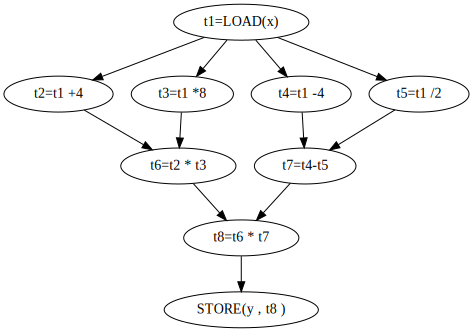

In [143]:
parse(sample)